# Exercise 1 - introducing t-test 

You have already learned about the the command line, scripts, and functions. R has one more level of organisation. Packages. Packages are sets of functions. We have already used one of these. Packages can also include data. We are now going to install a package, load it, and use it just for it's data. 

The package level is what makes R so powerful as a an open source language. you can make a package, get it reviewed, and have it stored on CRAN (Comprehensive R Archive Network) where everyone can download it. This means that R is an active environment for the development of statistical methods and theory.

Description of the package here: https://simplystatistics.org/2018/01/22/the-dslabs-package-provides-datasets-for-teaching-data-science/

In [1]:
install.packages('dplyr') 
install.packages('ggplot2') 
install.packages('dslabs') 

Installing package into ‘/usr/local/spark-3.5.4-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.4-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.4-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [2]:
library(dslabs)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Let's conduct an analysis of the height data - self-reported heights in inches

In [3]:
data("heights")

This gives us a data frame.

In [4]:
str(heights)

'data.frame':	1050 obs. of  2 variables:
 $ sex   : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 1 1 1 1 2 ...
 $ height: num  75 70 68 74 61 65 66 62 66 67 ...


First let's make frequency distributions for the women and men seperately.

You can make some quick and dirty separate plots using a basic function and indexing...

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


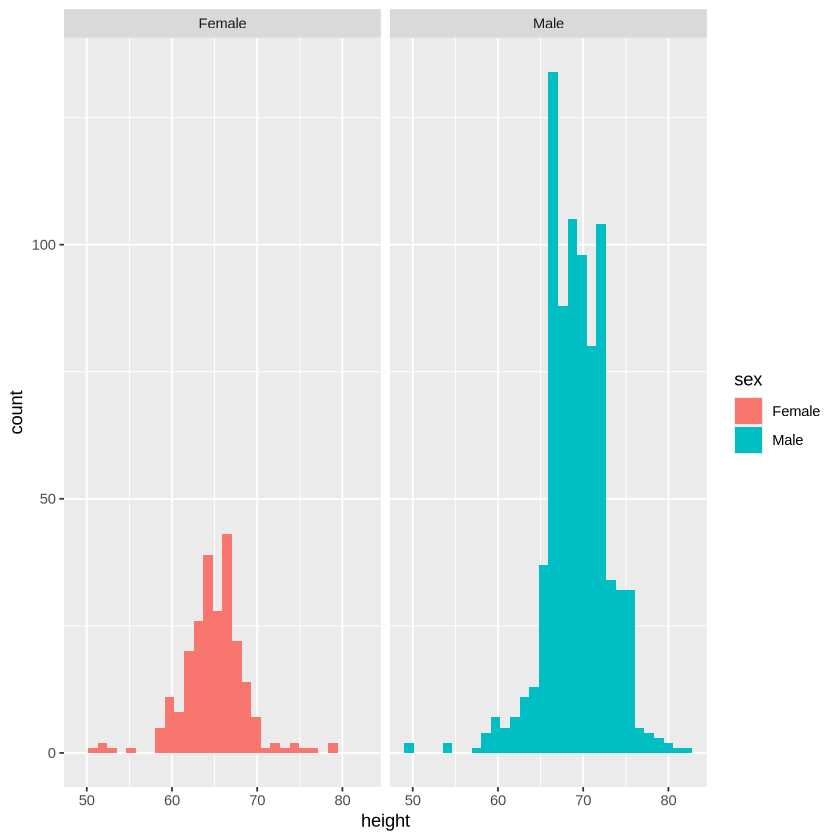

In [20]:
ggplot(heights, aes(x = height, fill = sex)) + geom_histogram() + facet_wrap(~sex)

... though it would be better if we could see all the data together on the same histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


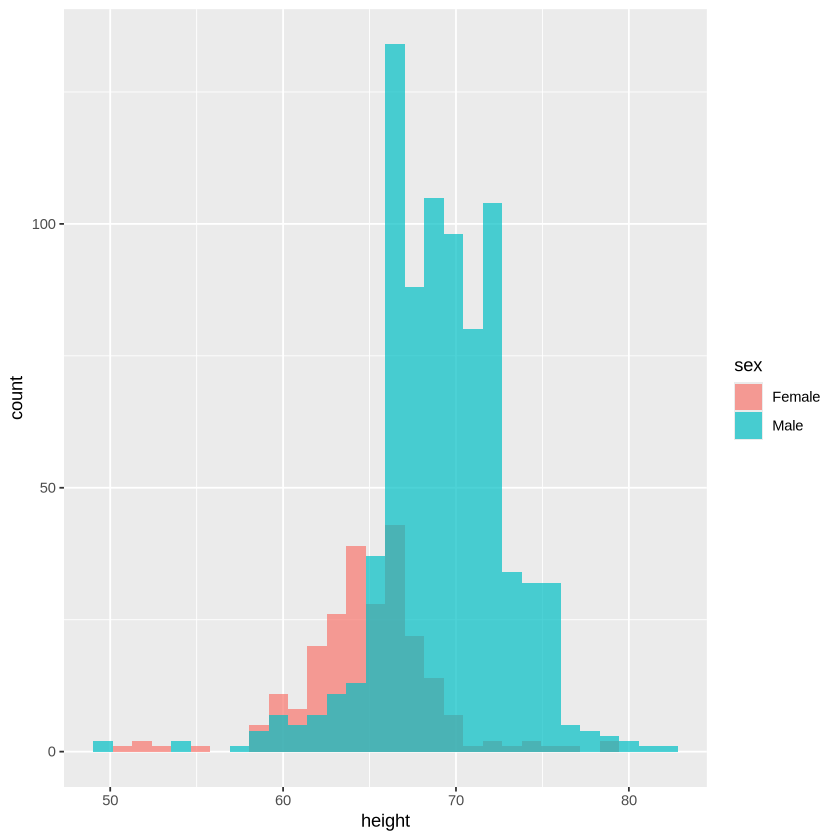

In [21]:
ggplot(data = heights, aes(x = height, fill = sex)) + 
geom_histogram(position = 'identity', alpha = 0.7)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


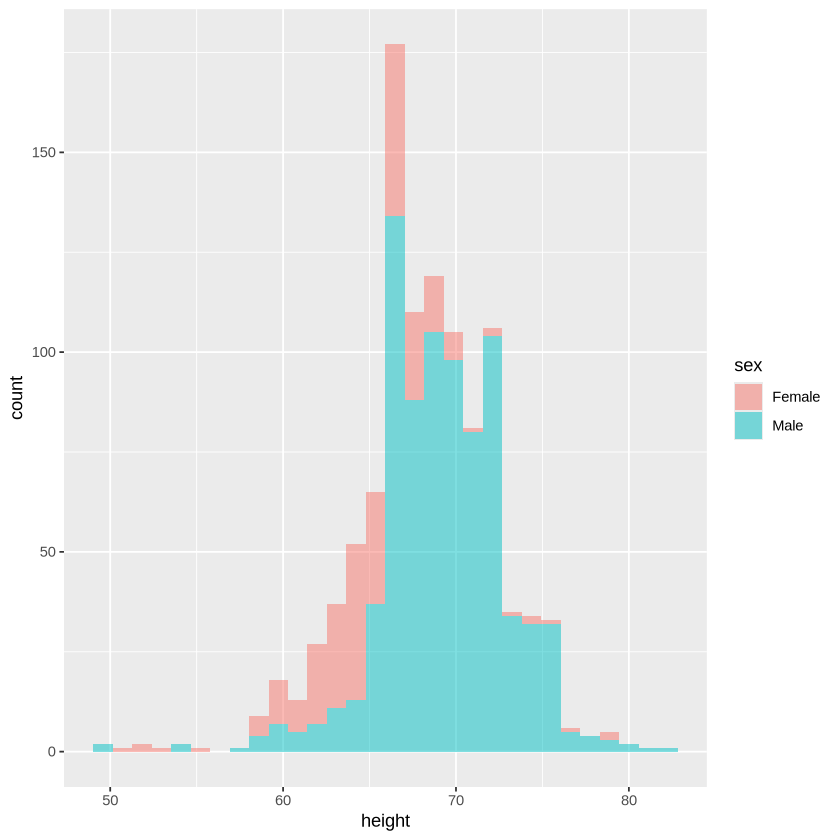

In [22]:
ggplot(data = heights,
       aes(x = height, 
           fill = sex)) +
  geom_histogram(alpha = 0.5)

So, without identity we can see that the plot is just going for the proportions by density, while identity gives us the raw count. Which means that we have a significantly higher amount of males in our dataframe, which we should take notice of when assuming height difference across sex.

Let's look at the summary statistics - you can actually make them in 1 table!

In [26]:
stats <- heights %>% group_by(sex) %>% 
summarise(mean = mean(height), median = median(height), sd = sd(height))

In [27]:
stats

sex,mean,median,sd
<fct>,<dbl>,<dbl>,<dbl>
Female,64.93942,64.98031,3.760656
Male,69.31475,69.00000,3.611024


While our table does tell us that males have a higher average mean, with a more or less similar standard deviation. Here it would be good to see if our distributions are following normality.

In [28]:
shapiro.test(heights$height[heights$sex=="Male"])
shapiro.test(heights$height[heights$sex=="Female"])


	Shapiro-Wilk normality test

data:  heights$height[heights$sex == "Male"]
W = 0.96374, p-value = 2.623e-13



	Shapiro-Wilk normality test

data:  heights$height[heights$sex == "Female"]
W = 0.94255, p-value = 4.671e-08


Considering both distributions are closing into W = 1, and each p-value is under 0.05. We can assume that both distributions are more or less normal.

Lets try visualising the data in terms of probability distributions

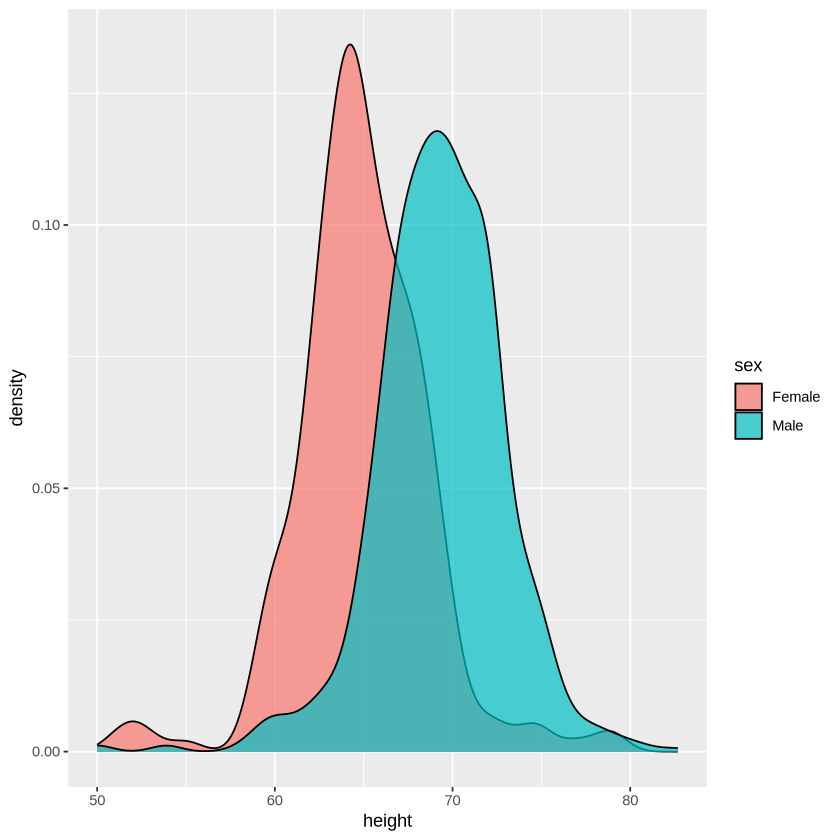

In [30]:
ggplot(heights, aes(x = height, fill = sex)) +
  geom_density(alpha = 0.7)

Now we are ready to run a hypothesis test. Are men taller than women? What sort of t test should we do?

In [31]:
t.test(height~sex,data=heights)


	Welch Two Sample t-test

data:  height by sex
t = -15.925, df = 374.41, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -4.915553 -3.835108
sample estimates:
mean in group Female   mean in group Male 
            64.93942             69.31475 


Given the very small p-value and the clear difference in means (t-value), we can confidentally say that our data suggests that males are on average taller than females. 

Our confidence interval tells us that we can expect with 95% certainity that the average male would be 3.8 to 4.9 inches taller than the average female.

Our degrees of freedom also tells us that our sample size is big enough to make such estimates.

# Exercise 2 - Some more messy real world data

We have been dealing with data that is fairly well organised. Let's look at some data that is slightly more messy

Install and load the fuelconomy package, which has fuel economy data from the EPA: https://cran.r-project.org/web/packages/fueleconomy/fueleconomy.pdf

In [32]:
install.packages("fueleconomy")

Installing package into ‘/usr/local/spark-3.5.4-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [33]:
library(fueleconomy)

In [34]:
data(vehicles)

Let's set ourselves the task of comparing the city fuel economy of the midsize class of two car brands: Audi and VW

Our first step is to isolate the relevant data. There are many ways to do this. Here's one:

In [35]:
head(vehicles)

id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
13309,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,4,2.2,Regular,26,20
13310,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Manual 5-spd,Front-Wheel Drive,4,2.2,Regular,28,22
13311,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,6,3.0,Regular,26,18
14038,Acura,2.3CL/3.0CL,1998,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,4,2.3,Regular,27,19
14039,Acura,2.3CL/3.0CL,1998,Subcompact Cars,Manual 5-spd,Front-Wheel Drive,4,2.3,Regular,29,21
14040,Acura,2.3CL/3.0CL,1998,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,6,3.0,Regular,26,17


In [36]:
str(vehicles)

tibble [33,442 × 12] (S3: tbl_df/tbl/data.frame)
 $ id   : num [1:33442] 13309 13310 13311 14038 14039 ...
 $ make : chr [1:33442] "Acura" "Acura" "Acura" "Acura" ...
 $ model: chr [1:33442] "2.2CL/3.0CL" "2.2CL/3.0CL" "2.2CL/3.0CL" "2.3CL/3.0CL" ...
 $ year : num [1:33442] 1997 1997 1997 1998 1998 ...
 $ class: chr [1:33442] "Subcompact Cars" "Subcompact Cars" "Subcompact Cars" "Subcompact Cars" ...
 $ trans: chr [1:33442] "Automatic 4-spd" "Manual 5-spd" "Automatic 4-spd" "Automatic 4-spd" ...
 $ drive: chr [1:33442] "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" ...
 $ cyl  : num [1:33442] 4 4 6 4 4 6 4 4 6 5 ...
 $ displ: num [1:33442] 2.2 2.2 3 2.3 2.3 3 2.3 2.3 3 2.5 ...
 $ fuel : chr [1:33442] "Regular" "Regular" "Regular" "Regular" ...
 $ hwy  : num [1:33442] 26 28 26 27 29 26 27 29 26 23 ...
 $ cty  : num [1:33442] 20 22 18 19 21 17 20 21 17 18 ...


In [37]:
install.packages("magrittr")
install.packages("ggplot2")
install.packages("tidyverse")


Installing package into ‘/usr/local/spark-3.5.4-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.4-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.4-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bit’, ‘rematch’, ‘bit64’, ‘backports’, ‘data.table’, ‘gargle’, ‘cellranger’, ‘ids’, ‘timechange’, ‘vroom’, ‘tzdb’, ‘progress’, ‘selectr’, ‘broom’, ‘conflicted’, ‘dtplyr’, ‘forcats’, ‘googledrive’, ‘googlesheets4’, ‘haven’, ‘hms’, ‘lubridate’, ‘modelr’, ‘readr’, ‘readxl’, ‘reprex’, ‘rvest’


Warning message in install.packages("tidyverse"):
“installation of package ‘data.table’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘dtplyr’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘haven’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installa

In [38]:
library(magrittr)
library(tidyverse)
library(ggplot2)

ERROR: Error in library(tidyverse): there is no package called ‘tidyverse’


How many cars do we have in each group?

In [43]:
#The amounts
print("Audi")
nrow(Audi_Midsize)
print("VW")
nrow(VW_Midsize)

[1] "Audi"


[1] 157

[1] "VW"


[1] 97

In [44]:
Audi_Midsize = vehicles %>% 
    filter(make == "Audi") %>% 
    filter(class == "Midsize Cars")

In [45]:
VW_Midsize = vehicles %>% 
    filter(make == "Volkswagen") %>% 
    filter(class == "Midsize Cars")

Let's use t.test to compare performance of the two cars

In [47]:
t.test(Audi_Midsize$cty, VW_Midsize$cty)


	Welch Two Sample t-test

data:  Audi_Midsize$cty and VW_Midsize$cty
t = -7.1511, df = 125.12, p-value = 6.348e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.232765 -2.397743
sample estimates:
mean of x mean of y 
 16.29299  19.60825 


A low p-value with a strong t-value, assumes great significance with a great mean difference. 

Confidence interval tells us that we can assume with 95% confidence that a VW car, would be 2.39 to 4.2 cty-units higher than the average audi car. 

Let's visualise the data and see if this is the best way to ask our question

In [48]:
audi_VW = rbind(Audi_Midsize, VW_Midsize)

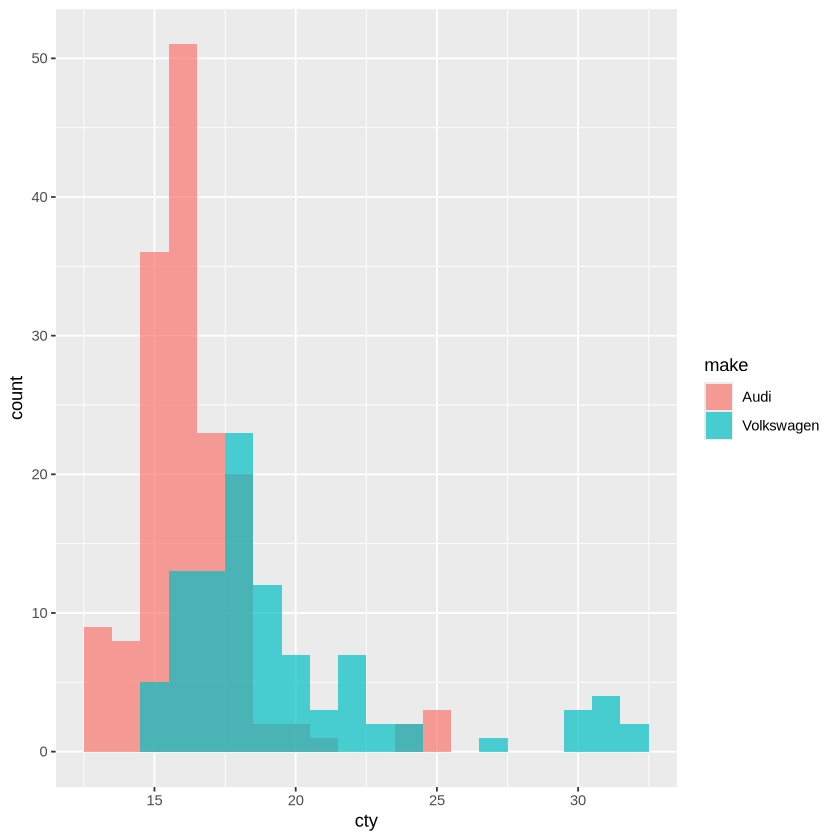

In [64]:
ggplot(audi_VW, aes(x = cty, fill = make)) +  
       geom_histogram(position = 'identity',  alpha = 0.7, bins = 20)

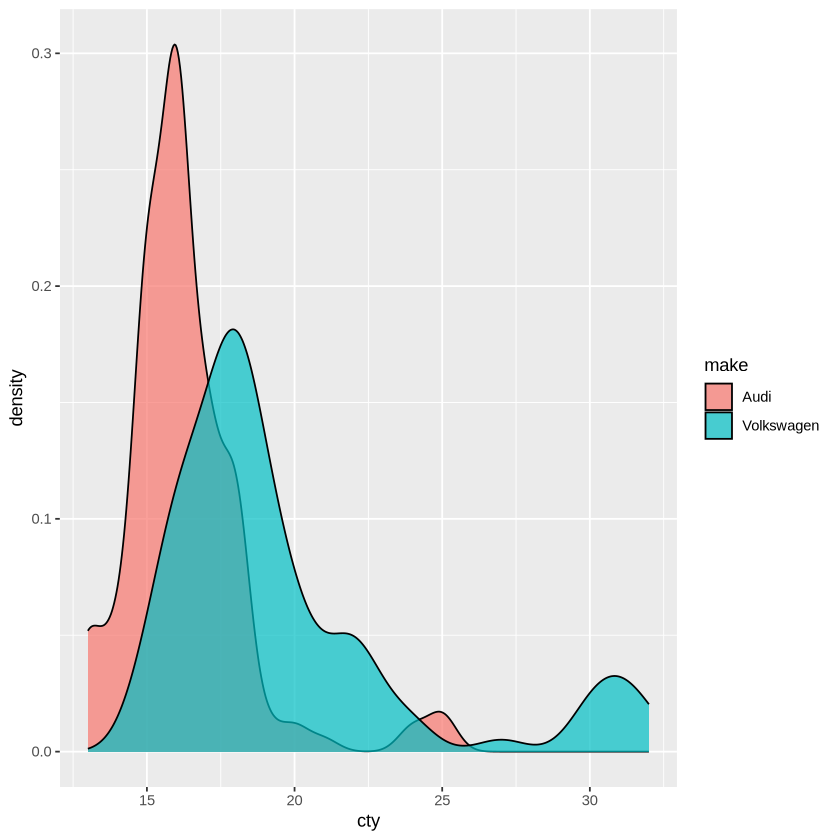

In [63]:
# density plots
ggplot(audi_VW, aes(x = cty, fill = make)) + 
    geom_density(alpha = 0.7)

We see that a normal distribution is an okay model for our data, but perhaps not the best one. We can see something important happening in the tails suggesting there is important structure we will miss.

Let's investigate that structure

In [66]:
str(audi_VW)

tibble [254 × 12] (S3: tbl_df/tbl/data.frame)
 $ id   : num [1:254] 5656 5657 6784 6785 7908 ...
 $ make : chr [1:254] "Audi" "Audi" "Audi" "Audi" ...
 $ model: chr [1:254] "100" "100" "100" "100" ...
 $ year : num [1:254] 1989 1989 1990 1990 1991 ...
 $ class: chr [1:254] "Midsize Cars" "Midsize Cars" "Midsize Cars" "Midsize Cars" ...
 $ trans: chr [1:254] "Automatic 3-spd" "Manual 5-spd" "Automatic 3-spd" "Automatic 4-spd" ...
 $ drive: chr [1:254] "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" ...
 $ cyl  : num [1:254] 5 5 5 5 5 6 6 6 6 6 ...
 $ displ: num [1:254] 2.3 2.3 2.3 2.3 2.3 2.8 2.8 2.8 2.8 2.8 ...
 $ fuel : chr [1:254] "Regular" "Regular" "Regular" "Regular" ...
 $ hwy  : num [1:254] 20 23 20 22 22 23 22 24 22 24 ...
 $ cty  : num [1:254] 17 16 16 16 16 15 17 17 17 17 ...


Let's make a scatterplot

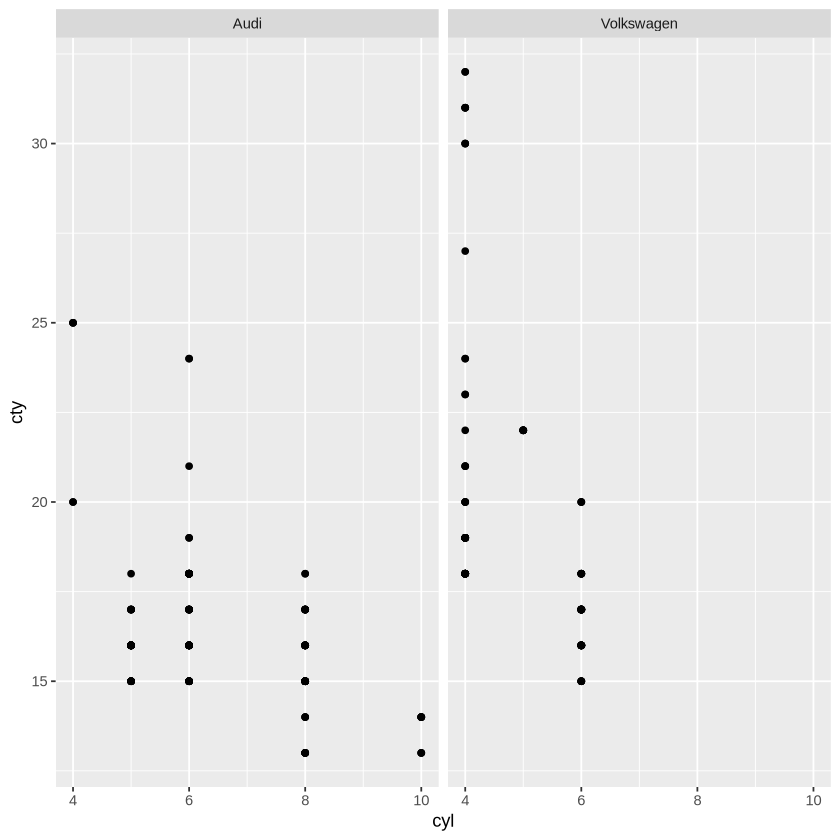

In [69]:
ggplot(audi_VW, 
      aes(x = cyl, y = cty)) +
    geom_point() +
    facet_wrap(~make)

Whats happening here is that we got over plotting, meaning multiple data points are placed in the same position, messing with the overall variance of the plot. We fix it by adding noise.

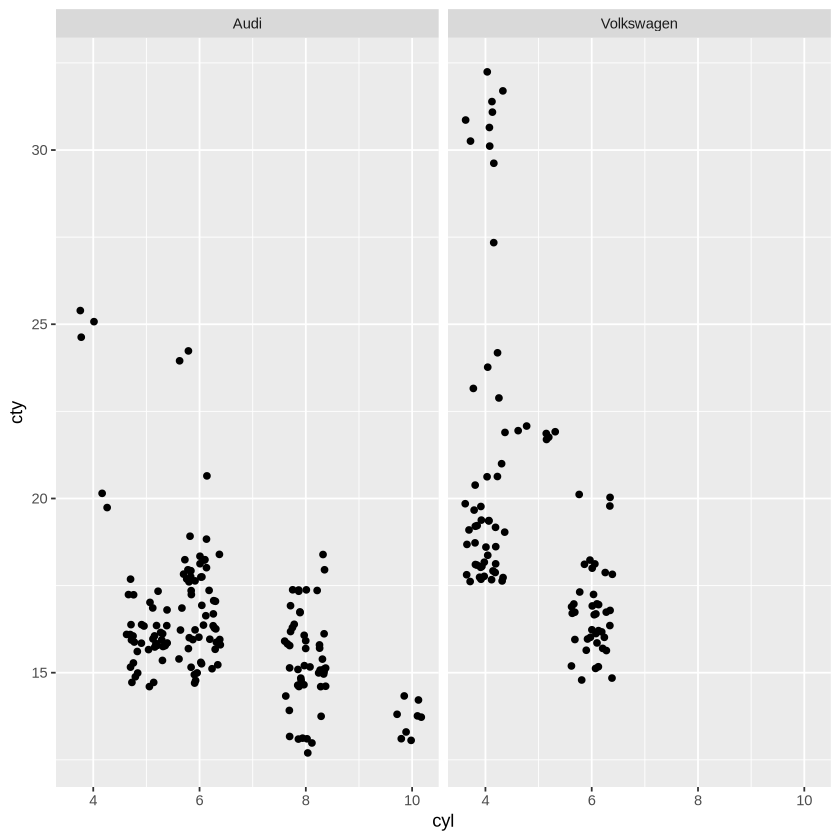

In [70]:
ggplot(data=audi_VW,aes(x=cyl, y=cty)) +
  geom_point(position = 'jitter') +
  facet_wrap(~make)

In terms of fuel efficiency, it is clear that Audi appears to focus on producing higher-cylinder cars, which consume more fuel and are therefore less fuel-efficient. While this may not necessarily be the exact cause, high-acceleration cars tend to make less use of gravitational momentum, which could explain the reduced efficiency.

Which means that the driving factor the midsized audi cars on average being less fuel efficient than VW, to be the quantaty of high-cyl cars. Though, it is important to also mention how VW does seem to have high efficiency on cyl 4 cars in comparison to audi cyl 4 cars, but thats also a question of sample size.